<a href="https://colab.research.google.com/github/monicadesai/Project---Effort-10---Concept-Understanding-10/blob/main/Project3_in_Deep_Learning_Spam_Filter_For_Quora_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!wget https://www.dropbox.com/sh/kpf9z73woodfssv/AAAwZ5DDt-aHwqZFHYrZ-ZBHa/train.csv

--2020-08-14 18:23:14--  https://www.dropbox.com/sh/kpf9z73woodfssv/AAAwZ5DDt-aHwqZFHYrZ-ZBHa/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/kpf9z73woodfssv/AAAwZ5DDt-aHwqZFHYrZ-ZBHa/train.csv [following]
--2020-08-14 18:23:14--  https://www.dropbox.com/sh/raw/kpf9z73woodfssv/AAAwZ5DDt-aHwqZFHYrZ-ZBHa/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc767195e50a7a0857bd7feb8e76.dl.dropboxusercontent.com/cd/0/inline/A9dPn4C8sJ4MKbt8lynFZ443hjYJqdfIgj-_8zcmeGkhaGhfAJFvV5a6hLoPddfWnGzd8JGTWCXEEk2J7Xne0e-m1jhuc9xo4YvTMgPLN3EkQQ/file# [following]
--2020-08-14 18:23:15--  https://uc767195e50a7a0857bd7feb8e76.dl.dropboxusercontent.com/cd/0/inline/A9dPn4C8sJ4MKbt8lynFZ443hjYJqdfIgj-_8zcmeGkhaGhfAJFvV5a6hLoP

In [ ]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip

--2020-08-14 18:23:24--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2020-08-14 18:23:25--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2020-08-14 18:23:25--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Sav

In [ ]:
!unzip /content/glove.42B.300d.zip

Archive:  /content/glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
print(df.shape)
df.head()

(1306122, 3)


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [ ]:
cols = df.columns
for col in cols:
  print('Number of unique values:', df[col].nunique())

Number of unique values: 1306122
Number of unique values: 1306122
Number of unique values: 2


In [ ]:
all_ques=" ".join(df['question_text'])
nspam_ques=" ".join(df.loc[df['target']==0,"question_text"])
spam_ques=" ".join(df.loc[df['target']==1,"question_text"])

In [ ]:
# Importing required packages

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

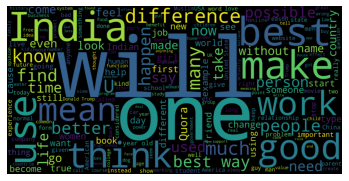

In [ ]:
wordcloud0 = WordCloud(stopwords=STOPWORDS, background_color='black', 
                      width=4000,height=2000).generate(all_ques)

plt.imshow(wordcloud0)
plt.axis('off')
plt.show()

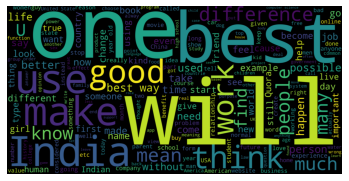

In [ ]:
wordcloud1 = WordCloud(stopwords=STOPWORDS, background_color='black', 
                      width=4000,height=2000).generate(nspam_ques)

plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

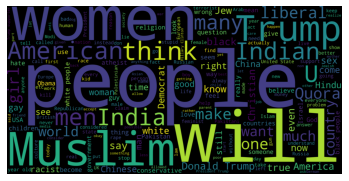

In [ ]:
wordcloud2 = WordCloud(stopwords=STOPWORDS, background_color='black', 
                      width=4000,height=2000).generate(spam_ques)

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [ ]:
df['length']=[len(x) for x in df['question_text']]

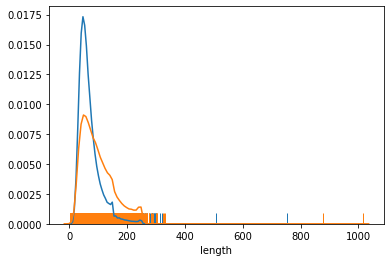

In [ ]:
sns.distplot(df.loc[df['target']==0,'length'], hist=False, rug=True);
sns.distplot(df.loc[df['target']==1,'length'], hist=False, rug=True);

In [ ]:
df['length'].max(), df['length'].min()

(1017, 1)

In [ ]:
# Checking Missing Values

df.isnull().sum()

qid              0
question_text    0
target           0
length           0
dtype: int64

In [ ]:
X = df['question_text'].values
y = df['target'].values

In [ ]:
X

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       ..., 'Is foam insulation toxic?',
       'How can one start a research project based on biochemistry at UG level?',
       'Who wins in a battle between a Wolverine and a Puma?'],
      dtype=object)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X)
print(vocab_size)
# pad documents to a max length of 4 words
max_length = 20
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(len(padded_docs))

222162
1306122


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.2, random_state=42)

In [ ]:
embeddings_index = dict()
f = open("/content/glove.42B.300d.txt")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 1917494 word vectors.


In [ ]:
# Creating our own embedding matrix to bring down the size to 300.
# We'll use 300 D vector representation of the words from pretrained embedding index that we downloaded.
# If there are specific words which are not present in pretrained embedding their weights will remain 0. 
# If there are too many such words, then you should probably not use pretrained embeddings.


embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

(222162, 300)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding


In [ ]:
# Define the model
# Now while creating the model for text data, we'll keep embedding layer weights non-trainable as we are supplying those values from our end. 


model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=20, trainable=False))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))



In [ ]:
# summarize the model

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 300)           66648600  
_________________________________________________________________
flatten_1 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6001      
Total params: 66,654,601
Trainable params: 6,001
Non-trainable params: 66,648,600
_________________________________________________________________
None


In [ ]:
# Keras Callback

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras import models
from keras.models import load_model

filepath='/content/model_{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True)
earlystop = EarlyStopping(monitor='val_accuracy', patience=15,verbose=1)



In [ ]:
# compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model

h = model.fit(
              X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=30, batch_size=512,
              callbacks=[checkpoint,earlystop])

Epoch 1/30
2040/2041 [============================>.] - ETA: 0s - loss: 0.1445 - accuracy: 0.9464
Epoch 00001: val_accuracy improved from -inf to 0.94851, saving model to /content/model_0.9485.h5
2041/2041 [==============================] - 20s 10ms/step - loss: 0.1445 - accuracy: 0.9464 - val_loss: 0.1367 - val_accuracy: 0.9485
Epoch 2/30
2041/2041 [==============================] - ETA: 0s - loss: 0.1366 - accuracy: 0.9482
Epoch 00002: val_accuracy did not improve from 0.94851
2041/2041 [==============================] - 19s 9ms/step - loss: 0.1366 - accuracy: 0.9482 - val_loss: 0.1360 - val_accuracy: 0.9485
Epoch 3/30
2041/2041 [==============================] - ETA: 0s - loss: 0.1356 - accuracy: 0.9485
Epoch 00003: val_accuracy improved from 0.94851 to 0.94870, saving model to /content/model_0.9487.h5
2041/2041 [==============================] - 19s 10ms/step - loss: 0.1356 - accuracy: 0.9485 - val_loss: 0.1358 - val_accuracy: 0.9487
Epoch 4/30
2040/2041 [==========================

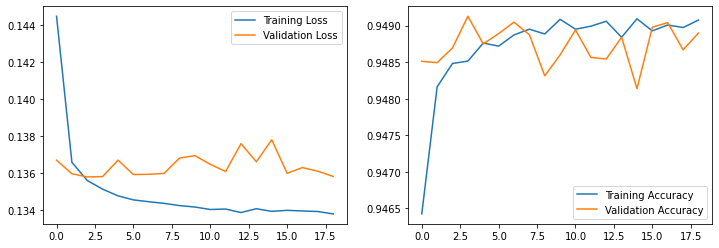

In [ ]:
losses = h.history['loss']
accs = h.history['accuracy']
val_losses = h.history['val_loss']
val_accs = h.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
import keras
model = keras.models.load_model('/content/model_0.9491.h5')


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 300)           66648600  
_________________________________________________________________
flatten_1 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6001      
Total params: 66,654,601
Trainable params: 6,001
Non-trainable params: 66,648,600
_________________________________________________________________


In [ ]:
preds = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %f' % (accuracy*100))

8164/8164 [==============================] - 12s 1ms/step - loss: 0.1358 - accuracy: 0.9491
Accuracy: 94.912815


In [ ]:
preds[preds==1]

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds))

[[241925   3444]
 [  9845   6011]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    245369
           1       0.64      0.38      0.47     15856

    accuracy                           0.95    261225
   macro avg       0.80      0.68      0.72    261225
weighted avg       0.94      0.95      0.94    261225

0.9491281462340894
